## Nandini Kongani
## CWID: 20020621
## HW06_RF_C50

## 6.2

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [26]:
# Loading the dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [27]:
#Identifying the missing values
missing_values = df.isin(['?']).sum()
missing_values

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [28]:
# Repleace missing values 
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [29]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  683 non-null    int64
 1   F1      683 non-null    int64
 2   F2      683 non-null    int64
 3   F3      683 non-null    int64
 4   F4      683 non-null    int64
 5   F5      683 non-null    int64
 6   F7      683 non-null    int64
 7   F8      683 non-null    int64
 8   F9      683 non-null    int64
 9   Class   683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F6      683 non-null    object
dtypes: object(1)
memory usage: 10.7+ KB


In [30]:
# Drop the 'Sample' column from the dataset
attr = df.drop(['Sample', 'Class'], axis=1)
target = df['Class']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=8)

In [32]:
#Fit the model
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [33]:
# Printing the accuracy score
print(f"Accuracy= {accuracy_score(target_test, target_pred)}")

# Printing the confusion matrix
print(confusion_matrix(target_test, target_pred))

# Printing the classification report
print(classification_report(target_test, target_pred))

Accuracy= 0.948905109489051
[[78  1]
 [ 6 52]]
              precision    recall  f1-score   support

           2       0.93      0.99      0.96        79
           4       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [34]:

mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")

gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.04729854 0.3424266  0.21695001 0.02788748 0.06482666 0.12789797
 0.1145886  0.04974948 0.00837466]

Mean Decrease GINI= [0.02066364 0.14959828 0.09478045 0.0121834  0.02832127 0.05587567
 0.05006112 0.0217344  0.0036587 ]


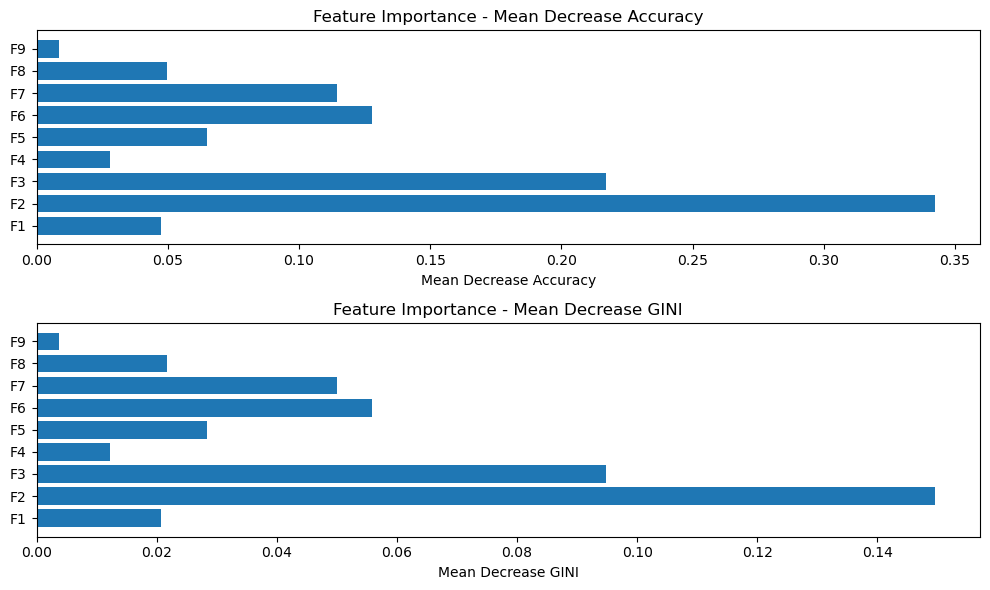

In [35]:
plt.figure(figsize=(10, 6))

# Plot for Mean Decrease Accuracy
plt.subplot(2, 1, 1)
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')


# Plot for Mean Decrease GINI
plt.subplot(2, 1, 2)
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')

plt.tight_layout()
plt.show()

In [36]:
feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

F2    0.342427
F3    0.216950
F6    0.127898
F7    0.114589
F5    0.064827
F8    0.049749
F1    0.047299
F4    0.027887
F9    0.008375
dtype: float64
